In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Utils funcs

In [2]:
def generate_data(x1_root_pos, x2_root_pos, x1_root_neg, x2_root_neg, n_sample, test_raito=0.3):
    # Generate two sets of data point and label
    x1_pos = np.random.rand(n_sample) + x1_root_pos
    x2_pos = np.random.rand(n_sample) + x2_root_pos
    x1_neg = np.random.rand(n_sample) + x1_root_neg
    x2_neg = np.random.rand(n_sample) + x2_root_neg
    label = np.concatenate([np.ones(n_sample, dtype=float), np.zeros(n_sample, dtype=float)])
    
    # Combine features and shuffle
    x1_data = np.expand_dims(np.concatenate([x1_pos, x1_neg]), axis=1)
    x2_data = np.expand_dims(np.concatenate([x2_pos, x2_neg]), axis=1)
    x_data = np.concatenate([x1_data, x2_data], axis=1)
    
    # Split train test set
    x_train, x_test, label_train, label_test = train_test_split(x_data, label, test_size=test_raito, random_state=42)
    return x_train, x_test, label_train, label_test


def visualize_data(x, label, title=''):
    # Plot data using matplot lib
    for i in range(len(label)):
        if label[i] == 0:
            plt.plot(x[i][0], x[i][1], 'b+')
        elif label[i] == 1:
            plt.plot(x[i][0], x[i][1], 'ro')
    
    plt.ylabel('X1 Feature')
    plt.xlabel('X2 Feature')
    plt.title(title)
    plt.show()

def draw_model(a, b, c):
    # Draw line ax + by + c = 0
    x = np.arange(-2, 2, 0.2)
    y = (-a * x - c) / b
    plt.plot(x, y)

## Init model

In [26]:
def define_parameters():
    # TODO 1: Initialize parameters of logistic model
    a = tf.Variable(initial_value=tf.random_normal(shape=(), dtype=tf.float32))
    b = tf.Variable(initial_value=tf.random_normal(shape=(), dtype=tf.float32))
    c = tf.Variable(initial_value=tf.random_normal(shape=(), dtype=tf.float32))
    return (a , b , c)
    pass

def define_cost_func(X1, X2, L, a, b, c, n_sample):
    # TODO 2: define hypothesis 'h' and cost function cost 'cost'
    # h = sigmoid(ax1 +bx2 + c)
    h = tf.sigmoid(a * X1 + b * X2 + c)
    cost = -1 * tf.reduce_sum(L * tf.log(h) + (1 - L) * tf.log(1 - h)) / n_sample
    return cost

def define_optimizer(l_rate, cost_func):
    # Define optimizer and initializer
    optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_func)
    initializer = tf.global_variables_initializer()
    return optimizer, initializer

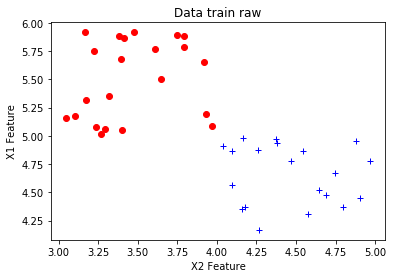

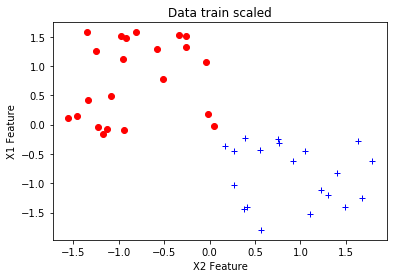

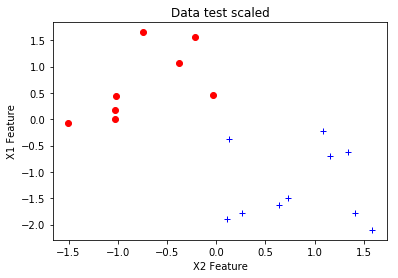

In [31]:
# Step 1: Generate and visualize training data
n_sample = 30
x_train, x_test, label_train, label_test = generate_data(3, 5, 4, 4, n_sample)
visualize_data(x_train, label_train, "Data train raw")

# Step 1b: Normalize Xs and re-visualize training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

visualize_data(x_train, label_train, "Data train scaled")
visualize_data(x_test, label_test, "Data test scaled")

# Step 2: Initialize Placeholders for input data
X1 = tf.placeholder(np.float32)
X2 = tf.placeholder(np.float32)
L = tf.placeholder(np.float32)
batch_size = tf.placeholder(tf.float32)

### Step 3: Build up your first model: LOGISTIC REGRESSOR
a, b, c = define_parameters()
cost = define_cost_func(X1, X2, L, a, b, c, batch_size)

# Step 4: Create optimizer
l_rate = 0.2
optimizer, initializer = define_optimizer(l_rate, cost)

## Train model

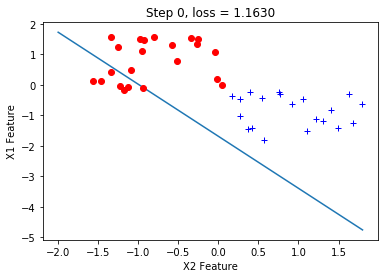

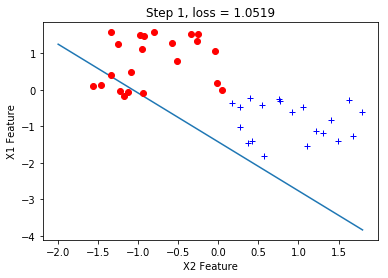

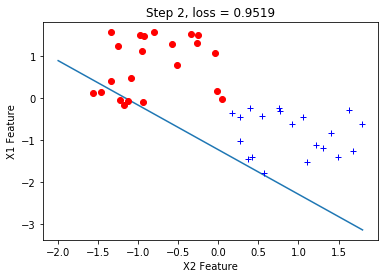

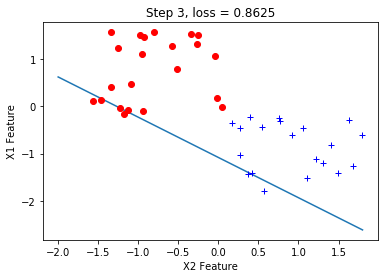

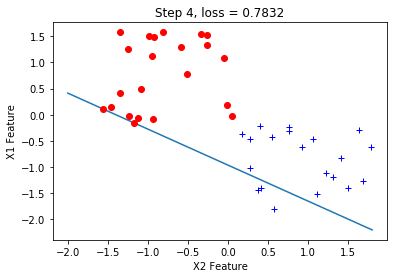

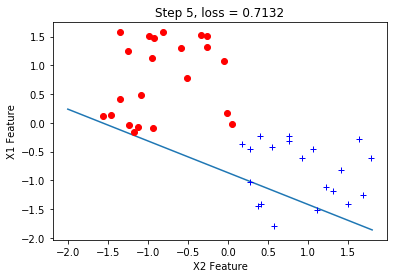

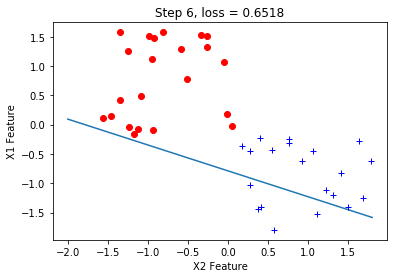

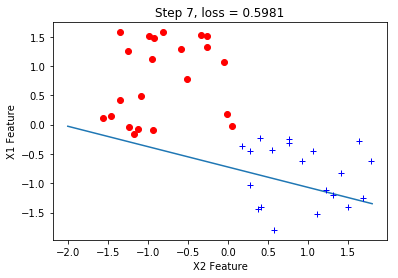

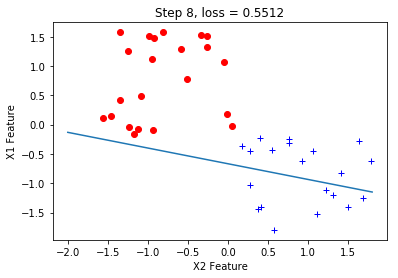

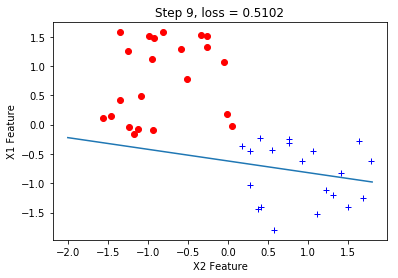

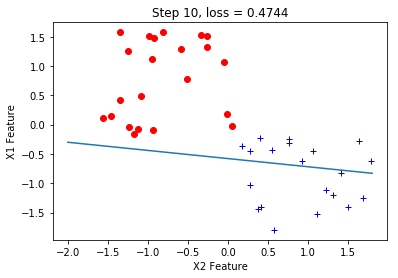

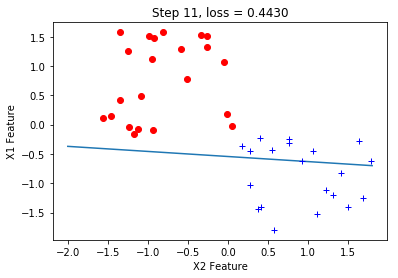

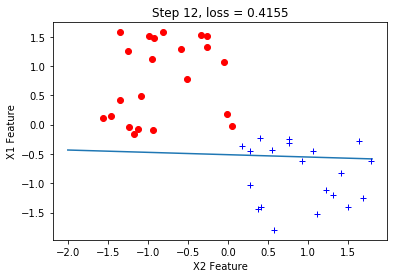

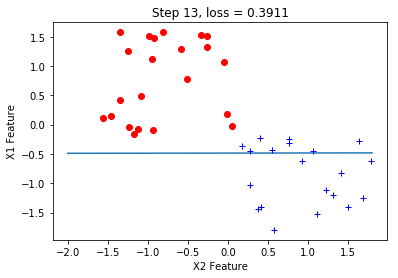

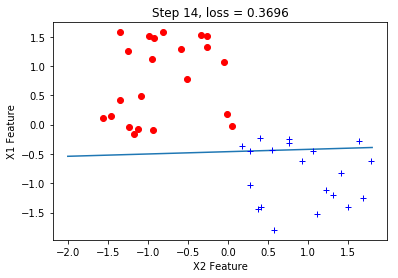

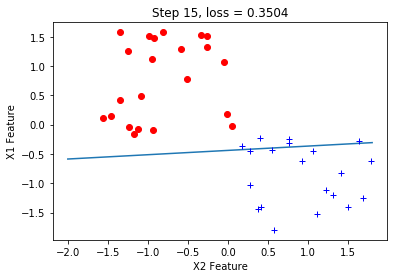

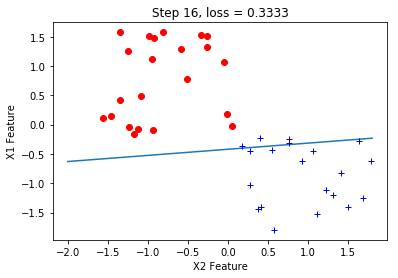

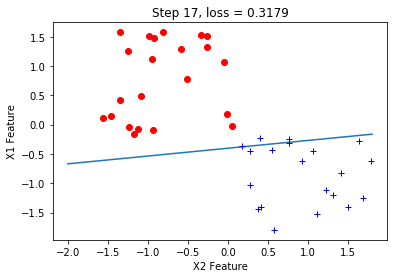

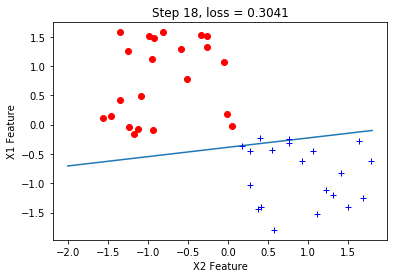

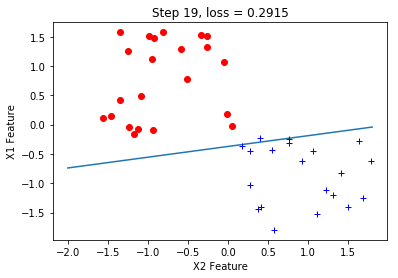

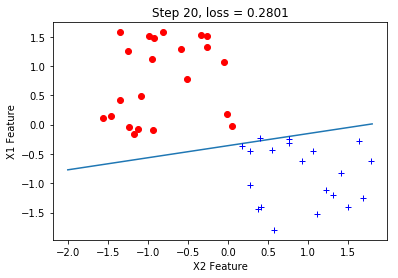

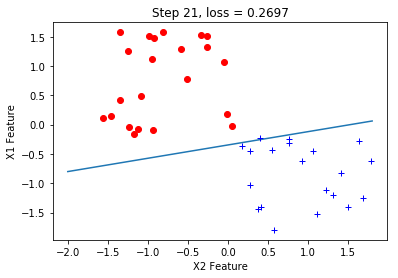

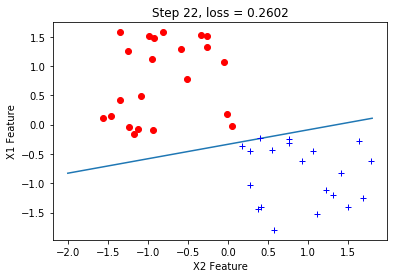

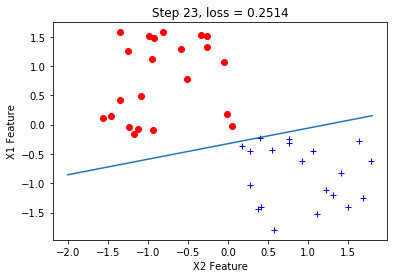

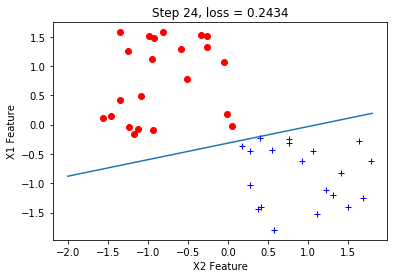

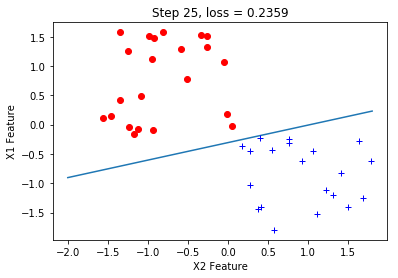

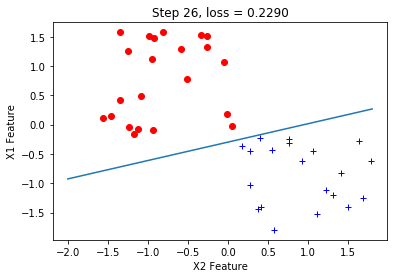

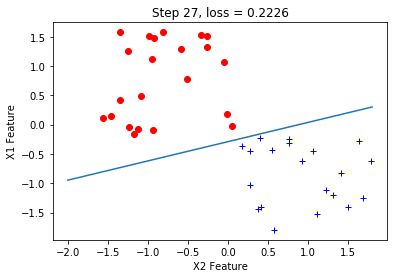

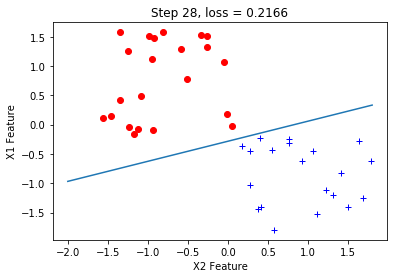

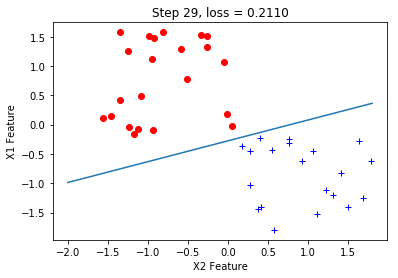

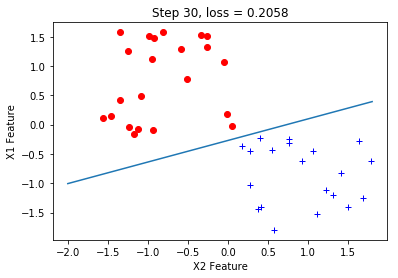

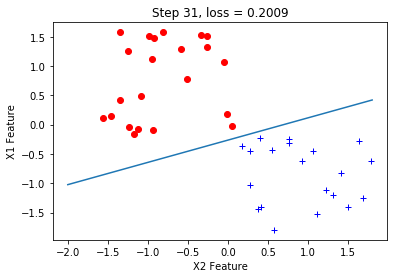

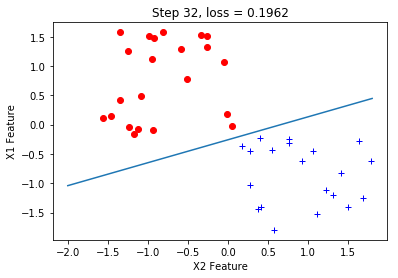

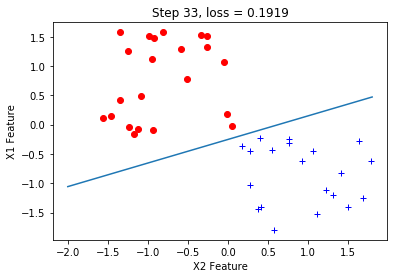

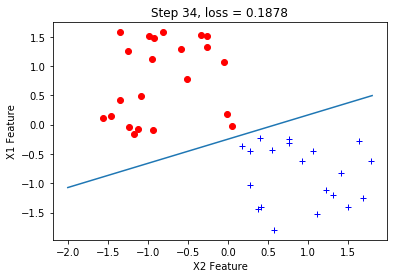

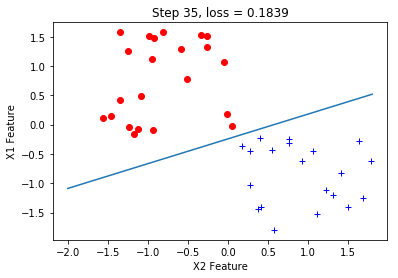

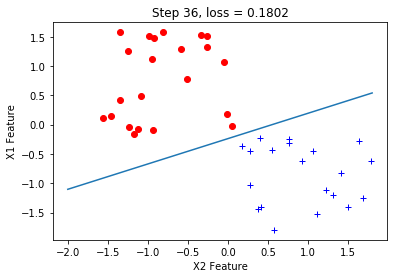

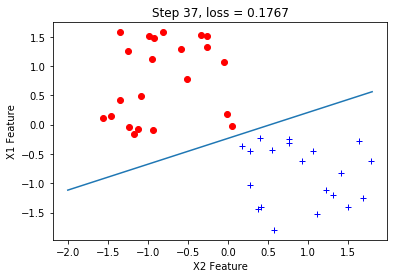

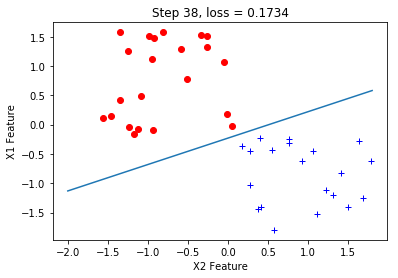

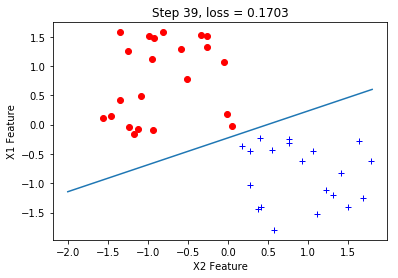

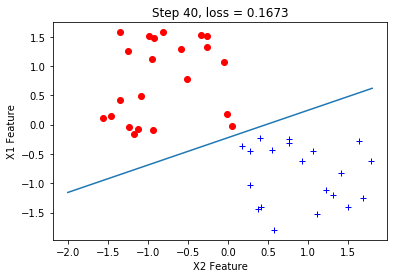

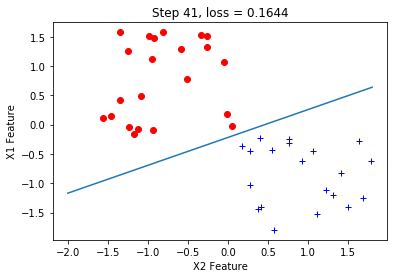

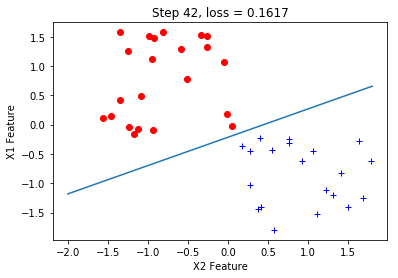

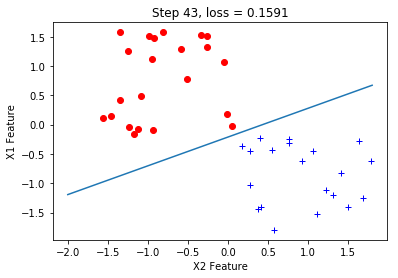

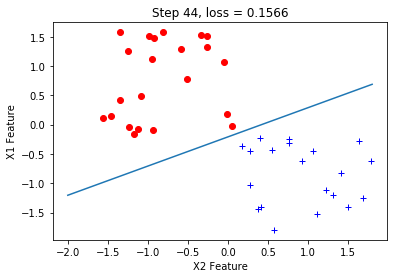

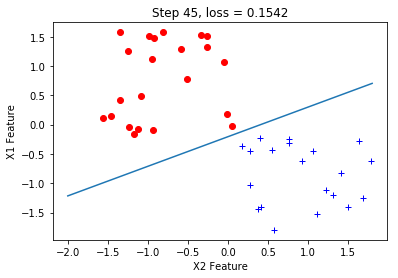

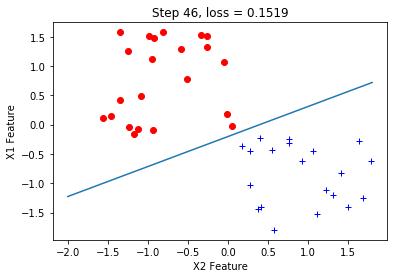

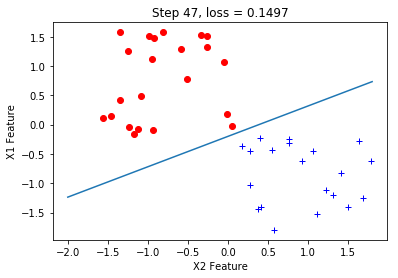

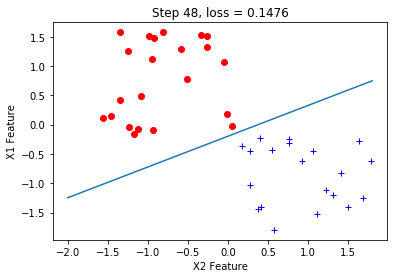

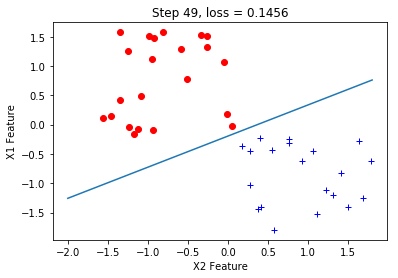

Optimized variable: a_op =  -1.0226228
Optimized variable: b_op =  1.9250219
Optimized variable: c_op =  0.3755584


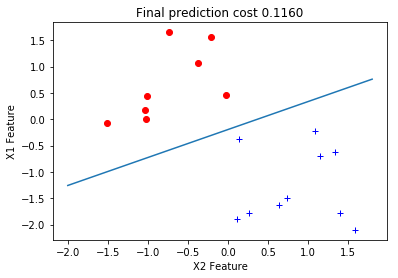

In [33]:
with tf.Session() as sess:
    sess.run(initializer)
    for i in range(50):
        _, train_cost = sess.run([optimizer, cost], feed_dict={X1: x_train[:, 0], X2: x_train[:, 1], L: label_train, batch_size: len(label_train)})
        
        a_op = sess.run(a)
        b_op = sess.run(b)
        c_op = sess.run(c)
        
        draw_model(a_op, b_op, c_op)
        visualize_data(x_train, label_train,"Step {}, loss = {:.4f}".format(i, train_cost))

    test_cost = sess.run(cost, feed_dict={X1: x_test[:, 0], X2: x_test[:, 1], L: label_test, batch_size: len(label_test)})
    print('Optimized variable: a_op = ', a_op)
    print('Optimized variable: b_op = ', b_op)
    print('Optimized variable: c_op = ', c_op)
    draw_model(a_op, b_op, c_op)
    visualize_data(x_test, label_test, "Final prediction cost {:.4f}".format(test_cost))